In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train1 = pd.DataFrame(train)
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train1 = train1.drop(columns = ["Name","SibSp","Parch"])
train1


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,113803,53.1000,C123,S
4,5,0,3,male,35.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,112053,30.0000,B42,S
888,889,0,3,female,NaN,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,111369,30.0000,C148,C


In [5]:
%matplotlib inline

In [6]:
train1['Sex'] = train1['Sex'].map({'male': 0, 'female': 1})
train1

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,113803,53.1000,C123,S
4,5,0,3,0,35.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,211536,13.0000,NaN,S
887,888,1,1,1,19.0,112053,30.0000,B42,S
888,889,0,3,1,NaN,W./C. 6607,23.4500,NaN,S
889,890,1,1,0,26.0,111369,30.0000,C148,C


<Axes: ylabel='Frequency'>

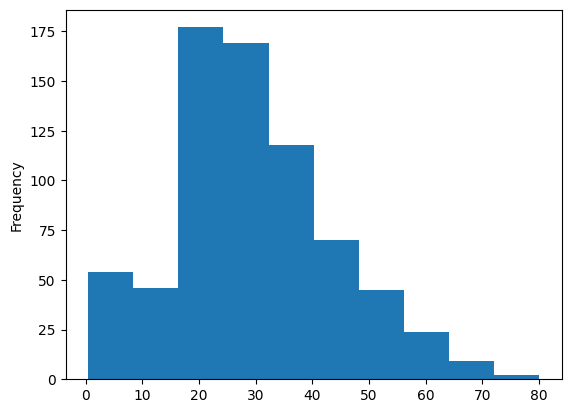

In [7]:
train1['Age'].plot(kind='hist')

In [8]:
train1

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,113803,53.1000,C123,S
4,5,0,3,0,35.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,211536,13.0000,NaN,S
887,888,1,1,1,19.0,112053,30.0000,B42,S
888,889,0,3,1,NaN,W./C. 6607,23.4500,NaN,S
889,890,1,1,0,26.0,111369,30.0000,C148,C


<Axes: ylabel='Frequency'>

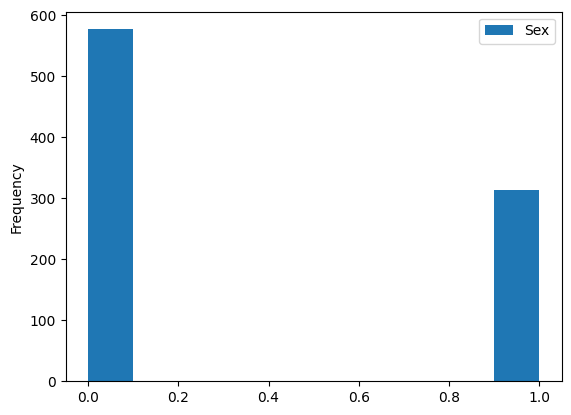

In [9]:
train1.plot(kind = 'hist', x = 'Age', y = 'Sex')

<Axes: xlabel='Pclass', ylabel='Age'>

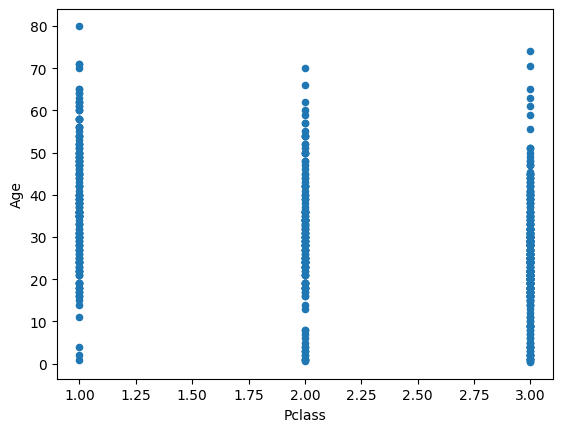

In [10]:
train1.plot(kind = 'scatter', x = 'Pclass', y = 'Age')

In [11]:


# Define the columns for correlation calculation
cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Select only the relevant columns
train_subset = train[cols]

# Convert categorical columns to numerical using one-hot encoding
train_subset = pd.get_dummies(train_subset, columns=["Sex", "Embarked"])

# Calculate the correlation matrix
train_corr = train_subset.corr()

# Display the correlation matrix
print(train_corr)


            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
Sex_female  0.543351 -0.131900 -0.093254  0.114631  0.245489  0.182333   
Sex_male   -0.543351  0.131900  0.093254 -0.114631 -0.245489 -0.182333   
Embarked_C  0.168240 -0.243292  0.036261 -0.059528 -0.011069  0.269335   
Embarked_Q  0.003650  0.221009 -0.022405 -0.026354 -0.081228 -0.117216   
Embarked_S -0.155660  0.081720 -0.032523  0.070941  0.063036 -0.166603   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.543351 -0.543351    0.16

Text(0.5, 1.0, 'annot=False')

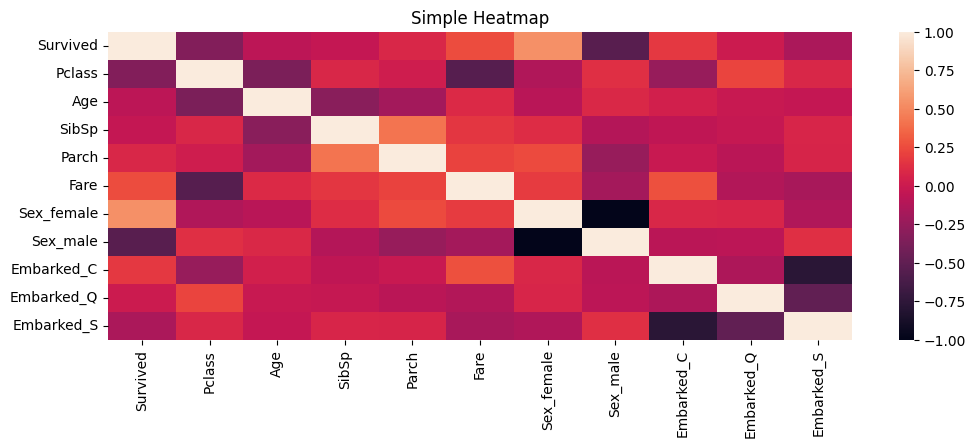

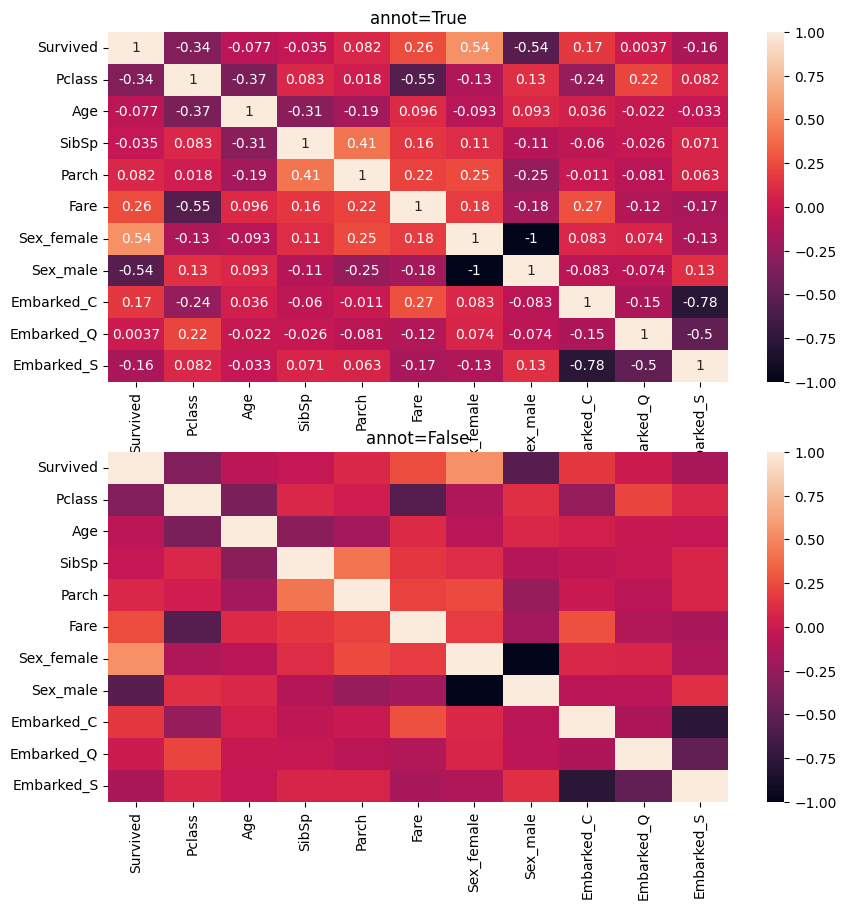

In [12]:
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']
numerical_data = train[numerical_columns]
numerical_data
correlation_matrix = numerical_data.corr()
correlation_threshold = 0.3  # You can adjust this threshold as needed
mask = abs(correlation_matrix) > correlation_threshold

# Generate a heatmap to visualize the correlations
fig,ax = plt.subplots(figsize=(12,4))
sns.heatmap(train_corr)
ax.set_title('Simple Heatmap')
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1)
sns.heatmap(train_corr,annot=False,ax=ax2)
ax1.set_title('annot=True')
ax2.set_title('annot=False')

In [13]:
train2 = train1['Survived'].isnull()
train2

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [14]:
train3 = train1['Cabin'].isnull()
train3

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [15]:
train1.dropna()
train1

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,113803,53.1000,C123,S
4,5,0,3,0,35.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,211536,13.0000,NaN,S
887,888,1,1,1,19.0,112053,30.0000,B42,S
888,889,0,3,1,NaN,W./C. 6607,23.4500,NaN,S
889,890,1,1,0,26.0,111369,30.0000,C148,C


In [16]:
train4 = train1.dropna(subset = ['Cabin'], how =  'all')
train4

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
1,2,1,1,1,38.0,PC 17599,71.2833,C85,C
3,4,1,1,1,35.0,113803,53.1000,C123,S
6,7,0,1,0,54.0,17463,51.8625,E46,S
10,11,1,3,1,4.0,PP 9549,16.7000,G6,S
11,12,1,1,1,58.0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,872,1,1,1,47.0,11751,52.5542,D35,S
872,873,0,1,0,33.0,695,5.0000,B51 B53 B55,S
879,880,1,1,1,56.0,11767,83.1583,C50,C
887,888,1,1,1,19.0,112053,30.0000,B42,S


In [17]:
train1 = train1.drop(columns = ["Cabin"])
train1


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,0,22.0,A/5 21171,7.2500,S
1,2,1,1,1,38.0,PC 17599,71.2833,C
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,S
3,4,1,1,1,35.0,113803,53.1000,S
4,5,0,3,0,35.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,211536,13.0000,S
887,888,1,1,1,19.0,112053,30.0000,S
888,889,0,3,1,NaN,W./C. 6607,23.4500,S
889,890,1,1,0,26.0,111369,30.0000,C


In [18]:
train5 = train1.dropna(subset = ['Age'], how =  'all')
train5

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,0,22.0,A/5 21171,7.2500,S
1,2,1,1,1,38.0,PC 17599,71.2833,C
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,S
3,4,1,1,1,35.0,113803,53.1000,S
4,5,0,3,0,35.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,382652,29.1250,Q
886,887,0,2,0,27.0,211536,13.0000,S
887,888,1,1,1,19.0,112053,30.0000,S
889,890,1,1,0,26.0,111369,30.0000,C


In [19]:
train6 = train1.dropna(subset = ['Ticket'], how = 'all')
train6

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,0,22.0,A/5 21171,7.2500,S
1,2,1,1,1,38.0,PC 17599,71.2833,C
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,S
3,4,1,1,1,35.0,113803,53.1000,S
4,5,0,3,0,35.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,211536,13.0000,S
887,888,1,1,1,19.0,112053,30.0000,S
888,889,0,3,1,NaN,W./C. 6607,23.4500,S
889,890,1,1,0,26.0,111369,30.0000,C


In [20]:
train7 = train6.drop(columns = ["Ticket"])
train7


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,0,22.0,7.2500,S
1,2,1,1,1,38.0,71.2833,C
2,3,1,3,1,26.0,7.9250,S
3,4,1,1,1,35.0,53.1000,S
4,5,0,3,0,35.0,8.0500,S
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,S
887,888,1,1,1,19.0,30.0000,S
888,889,0,3,1,NaN,23.4500,S
889,890,1,1,0,26.0,30.0000,C


In [21]:
train8 = train7.drop(columns = ["Embarked"])
train8

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500
...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000
887,888,1,1,1,19.0,30.0000
888,889,0,3,1,NaN,23.4500
889,890,1,1,0,26.0,30.0000


In [22]:
train8 = train8.fillna({'Pclass': train8['Pclass'].median()})
train8 = train8.fillna({'Sex': train8['Sex'].median()})
train8 = train8.fillna({'Age': train8['Age'].median()})
train8 = train8.fillna({'Fare': train8['Fare'].median()})

train8

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500
...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000
887,888,1,1,1,19.0,30.0000
888,889,0,3,1,28.0,23.4500
889,890,1,1,0,26.0,30.0000


In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

y = train8["Survived"]
X = train8.drop("Survived",axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
clf = LogisticRegression(random_state=0, max_iter =1000).fit(X_train, y_train)

In [25]:
prediction = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, prediction)


0.7988826815642458